In [1]:
import json
import pandas as pd
import copy
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [2]:
columns_dict={
    'hsnCd':'縣市代號',
    'hsnNm':'縣市名稱',
    'townCd':'鄉鎮區代號',
    'townNm':'鄉鎮區名稱',
    'storeCd':'分局代號',
    'storeNm':'分局名稱',
    'addr':'門市地址',
    'zipCd':'郵遞區號',
    'tel':'電話',
    'busiTime':'營業時間',
    'busiMemo':'營業備註',
    'longitude':'經度',
    'latitude':'緯度',
    'total':'服務量',
    'updateTime':'異動時間',
    'lowLine':'服務量低標'
}

In [3]:
df=pd.read_json('getPostData.json')
df.head()

,hsnCd,hsnNm,townCd,townNm,storeCd,storeNm,addr,zipCd,tel,busiTime,busiMemo,longitude,latitude,total,updateTime,lowLine
0,A,臺北市,NaN,中正區,100,臺北北門郵局(臺北901支),臺北市中正區忠孝西路一段120號1樓,100,(02)2381-3135,週一至週五 儲匯:08:30-21:00<br>週六:09:00-12:00<br>,集郵營業時間週一至週五08:30-18:00<br>房貸營業時間週一至週五08:30-17:...,121.511431,25.047355,1087,2020/09/03 20:27:58,127.14
1,A,臺北市,NaN,中正區,101,臺北東門郵局(臺北1支),臺北市中正區信義路二段163號,100,(02)2321-4679,週一至週五 儲匯:08:30-17:00<br>週六:09:00-12:00<br>,*本日可受理量：600<br>,121.528922,25.034080,577,2020/09/03 20:27:58,16.54
2,A,臺北市,NaN,萬華區,102,臺北漢中街郵局(臺北2支),臺北市萬華區漢中街173號,108,(02)2331-4069,週一至週五 儲匯:08:30-17:00<br>,*本日可受理量：550<br>,121.507005,25.041320,531,2020/09/03 20:27:58,4.02
3,A,臺北市,NaN,萬華區,103,臺北西園郵局(臺北3支),臺北市萬華區長沙街二段156、158、160、162號,108,(02)2331-4524,週一至週五 儲匯:08:30-17:00<br>,*本日可受理量：800<br>,121.501031,25.040769,781,2020/09/03 20:27:58,6.20
4,A,臺北市,NaN,萬華區,104,臺北龍山郵局(臺北4支),臺北市萬華區廣州街67號,108,(02)2306-4755,週一至週五 儲匯:08:30-17:00<br>,*本日可受理量：400<br>,121.504565,25.036559,391,2020/09/03 20:27:58,2.81


In [4]:
# 把columns換中文
df.columns=[columns_dict[col] for col in df.columns if col in columns_dict]
df

,縣市代號,縣市名稱,鄉鎮區代號,鄉鎮區名稱,分局代號,分局名稱,門市地址,郵遞區號,電話,營業時間,營業備註,經度,緯度,服務量,異動時間,服務量低標
0,A,臺北市,NaN,中正區,100,臺北北門郵局(臺北901支),臺北市中正區忠孝西路一段120號1樓,100,(02)2381-3135,週一至週五 儲匯:08:30-21:00<br>週六:09:00-12:00<br>,集郵營業時間週一至週五08:30-18:00<br>房貸營業時間週一至週五08:30-17:...,121.511431,25.047355,1087,2020/09/03 20:27:58,127.14
1,A,臺北市,NaN,中正區,101,臺北東門郵局(臺北1支),臺北市中正區信義路二段163號,100,(02)2321-4679,週一至週五 儲匯:08:30-17:00<br>週六:09:00-12:00<br>,*本日可受理量：600<br>,121.528922,25.034080,577,2020/09/03 20:27:58,16.54
2,A,臺北市,NaN,萬華區,102,臺北漢中街郵局(臺北2支),臺北市萬華區漢中街173號,108,(02)2331-4069,週一至週五 儲匯:08:30-17:00<br>,*本日可受理量：550<br>,121.507005,25.041320,531,2020/09/03 20:27:58,4.02
3,A,臺北市,NaN,萬華區,103,臺北西園郵局(臺北3支),臺北市萬華區長沙街二段156、158、160、162號,108,(02)2331-4524,週一至週五 儲匯:08:30-17:00<br>,*本日可受理量：800<br>,121.501031,25.040769,781,2020/09/03 20:27:58,6.20
4,A,臺北市,NaN,萬華區,104,臺北龍山郵局(臺北4支),臺北市萬華區廣州街67號,108,(02)2306-4755,週一至週五 儲匯:08:30-17:00<br>,*本日可受理量：400<br>,121.504565,25.036559,391,2020/09/03 20:27:58,2.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,Z,連江縣,NaN,莒光鄉,355,馬祖東莒郵局(臺北255支),連江縣莒光鄉東莒大坪村55號,211,(0836)89036,週一至週五 儲匯:08:30-12:30 13:00-16:30<br>,*本日可受理量：200<br>,119.972172,25.960157,197,2020/09/03 20:27:58,4.86
1295,A,臺北市,NaN,中山區,292,臺北樂群二路郵局(臺北192支),臺北市中山區樂群二路147號,104,(02)85023327,週一至週五 儲匯:08:30-17:00<br>,*本日可受理量：400<br>,121.557167,25.080134,380,2020/09/03 20:27:58,11.14
1296,E,高雄市,NaN,前鎮區,4144,高雄佛公郵局(高雄44支),高雄市前鎮區后安路147號,806,(07)8316006,週一至週五 儲匯:08:30-17:00<br>,*本日可受理量：700<br>,120.322705,22.573539,682,2020/09/03 20:27:58,2.71
1297,F,新北市,NaN,汐止區,1147,汐止建成路郵局(基隆47支),新北市汐止區建成路58號,221,(02)8691-5658,週一至週五 儲匯:08:30-17:00<br>,*本日可受理量：300<br>,121.663698,25.073096,292,2020/09/03 20:27:58,4.03


In [5]:
# 取要分析的columns
df2=copy.deepcopy(df)
df2=df2.iloc[:,[1,3,5,6,10,13,15]]
df2

,縣市名稱,鄉鎮區名稱,分局名稱,門市地址,營業備註,服務量,服務量低標
0,臺北市,中正區,臺北北門郵局(臺北901支),臺北市中正區忠孝西路一段120號1樓,集郵營業時間週一至週五08:30-18:00<br>房貸營業時間週一至週五08:30-17:...,1087,127.14
1,臺北市,中正區,臺北東門郵局(臺北1支),臺北市中正區信義路二段163號,*本日可受理量：600<br>,577,16.54
2,臺北市,萬華區,臺北漢中街郵局(臺北2支),臺北市萬華區漢中街173號,*本日可受理量：550<br>,531,4.02
3,臺北市,萬華區,臺北西園郵局(臺北3支),臺北市萬華區長沙街二段156、158、160、162號,*本日可受理量：800<br>,781,6.20
4,臺北市,萬華區,臺北龍山郵局(臺北4支),臺北市萬華區廣州街67號,*本日可受理量：400<br>,391,2.81
...,...,...,...,...,...,...,...
1294,連江縣,莒光鄉,馬祖東莒郵局(臺北255支),連江縣莒光鄉東莒大坪村55號,*本日可受理量：200<br>,197,4.86
1295,臺北市,中山區,臺北樂群二路郵局(臺北192支),臺北市中山區樂群二路147號,*本日可受理量：400<br>,380,11.14
1296,高雄市,前鎮區,高雄佛公郵局(高雄44支),高雄市前鎮區后安路147號,*本日可受理量：700<br>,682,2.71
1297,新北市,汐止區,汐止建成路郵局(基隆47支),新北市汐止區建成路58號,*本日可受理量：300<br>,292,4.03


In [6]:
city_list=[city for city in set(df2['縣市名稱'])]

In [12]:
vol_list=[]
for city in city_list:
    
    vol_total=df2.groupby('縣市名稱').get_group(city)['服務量'].sum()
    vol_list.append([city,vol_total])
    
df3=pd.DataFrame(vol_list,columns=['縣市','服務量']).set_index('縣市').sort_values('服務量').reset_index()
df3

,縣市,服務量
0,連江縣,1188
1,金門縣,4461
2,澎湖縣,4602
3,基隆市,11126
4,臺東縣,14119
5,嘉義市,14760
6,花蓮縣,15383
7,宜蘭縣,16233
8,苗栗縣,18455
9,新竹市,19529


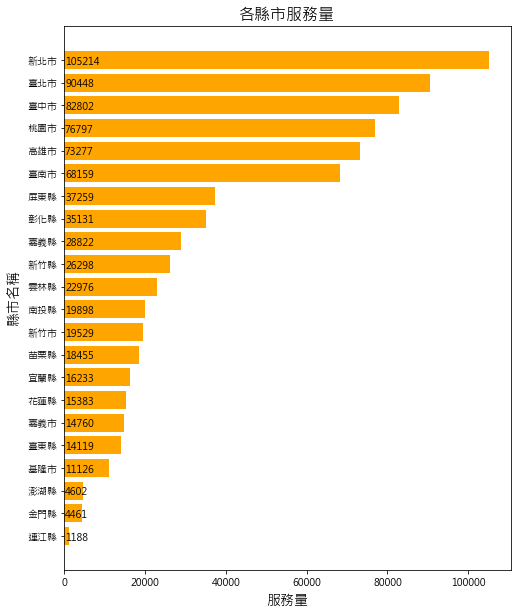

In [13]:
plt.figure(figsize=(8,10))
plt.xlabel('服務量',fontsize=14)
plt.ylabel('縣市名稱',fontsize=14)
plt.title('各縣市服務量',fontsize=16)

plt.barh(df3['縣市'],df3['服務量'],color='orange')

for i,city in enumerate(df3['縣市']):
    plt.text(200,i-0.2,df3.loc[i,'服務量'])


plt.show()

### 函式

In [16]:
def getVolBarh(fileName):
    # 套件匯入
    import json
    import pandas as pd
    import copy
    import matplotlib.pyplot as plt
    from matplotlib.font_manager import FontProperties
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
    plt.rcParams['axes.unicode_minus'] = False

    columns_dict={
    'hsnCd':'縣市代號',
    'hsnNm':'縣市名稱',
    'townCd':'鄉鎮區代號',
    'townNm':'鄉鎮區名稱',
    'storeCd':'分局代號',
    'storeNm':'分局名稱',
    'addr':'門市地址',
    'zipCd':'郵遞區號',
    'tel':'電話',
    'busiTime':'營業時間',
    'busiMemo':'營業備註',
    'longitude':'經度',
    'latitude':'緯度',
    'total':'服務量',
    'updateTime':'異動時間',
    'lowLine':'服務量低標'
    }

    try:
        df=pd.read_json(fileName)
    except Exceptation as e:
        print(e)
    
    df.columns=[columns_dict[col] for col in df.columns if col in columns_dict]    # columns換成中文
    df2=copy.deepcopy(df)
    df2=df2.iloc[:,[1,3,5,6,10,13,15]]
    city_list=[city for city in set(df2['縣市名稱'])]    
    
    # 資料整理
    vol_list=[]
    for city in city_list:
        vol_total=df2.groupby('縣市名稱').get_group(city)['服務量'].sum()
        vol_list.append([city,vol_total])
    df3=pd.DataFrame(vol_list,columns=['縣市','服務量']).set_index('縣市').sort_values('服務量').reset_index()    
    
    # 畫圖
    plt.figure(figsize=(8,10))
    plt.xlabel('服務量',fontsize=14)
    plt.ylabel('縣市名稱',fontsize=14)
    plt.title('各縣市服務量',fontsize=16)
    plt.barh(df3['縣市'],df3['服務量'],color='orange')
    for i,city in enumerate(df3['縣市']):
        plt.text(200,i-0.2,df3.loc[i,'服務量'])
    plt.show()

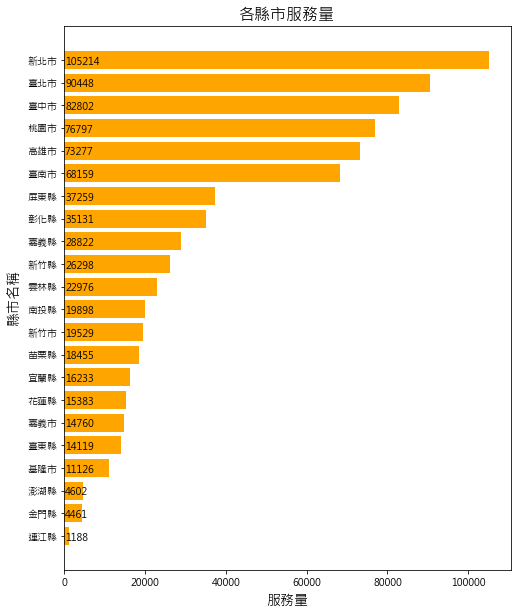

In [17]:
getVolBarh('getPostData.json')